In [ ]:
# Description: This code explores three trading strategies: MACD, Bollinger Bands, and MFI. 

In [381]:
# Import Libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [386]:
# Date format: YYYY, M, D

start = dt.datetime(2019,10,31)
end = dt.datetime(2020,10,31)

# Scrape the data from Yahoo Finance

CL = web.DataReader('CLF21.NYM','yahoo',start,end).reset_index()
HO = web.DataReader('HOF21.NYM','yahoo',start,end).reset_index()
AZ = web.DataReader('AMZN','yahoo',start,end).reset_index()

# Set the index

CL = CL.set_index(pd.DatetimeIndex(CL['Date'].values))
HO = HO.set_index(pd.DatetimeIndex(HO['Date'].values))
AZ = AZ.set_index(pd.DatetimeIndex(AZ['Date'].values))

<function matplotlib.pyplot.show>

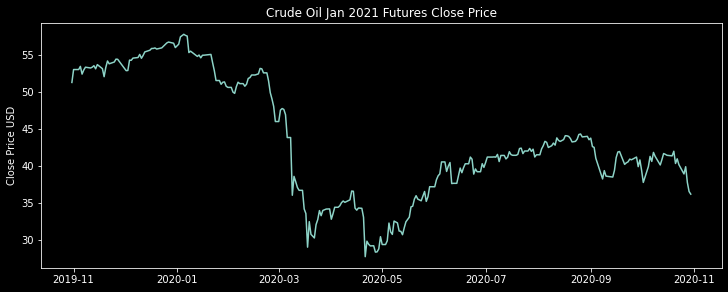

In [387]:
# Visually show the close price
plt.figure(figsize=(12.2, 4.5))
plt.title('Crude Oil Jan 2021 Futures Close Price')
plt.plot(CL['Close'])
plt.ylabel('Close Price USD')
plt.show

<function matplotlib.pyplot.show>

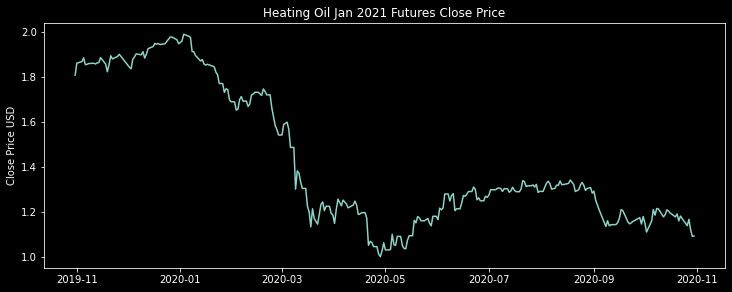

In [388]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Heating Oil Jan 2021 Futures Close Price')
plt.plot(HO['Close'])
plt.ylabel('Close Price USD')
plt.show

<function matplotlib.pyplot.show>

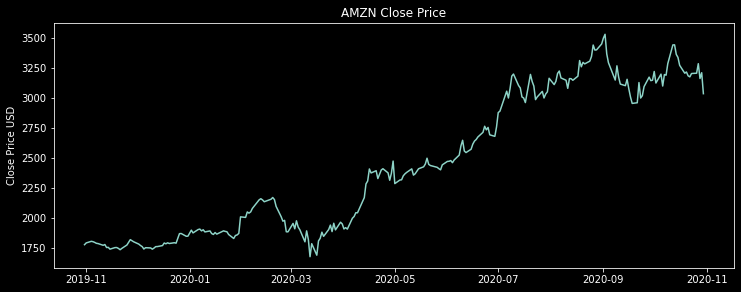

In [389]:
plt.figure(figsize=(12.2, 4.5))
plt.title('AMZN Close Price')
plt.plot(AZ['Close'])
plt.ylabel('Close Price USD')
plt.show

In [390]:
# Calculate the three moving averages 

# Calculate the short-fast moving average
ShortEMACL = CL.Close.ewm(span=5, adjust=False).mean()
# Calculate the middle-medium exponential moving average
MiddleEMACL = CL.Close.ewm(span=21, adjust=False).mean()
# Calculate the long-slow moving average
LongEMACL = CL.Close.ewm(span=63, adjust=False).mean()

# Calculate the short-fast moving average
ShortEMAHO = HO.Close.ewm(span=5, adjust=False).mean()
# Calculate the middle-medium exponential moving average
MiddleEMAHO = HO.Close.ewm(span=21, adjust=False).mean()
# Calculate the long-slow moving average
LongEMAHO = HO.Close.ewm(span=63, adjust=False).mean()

# Calculate the short-fast moving average
ShortEMAAZ = AZ.Close.ewm(span=5, adjust=False).mean()
# Calculate the middle-medium exponential moving average
MiddleEMAAZ = AZ.Close.ewm(span=21, adjust=False).mean()
# Calculate the long-slow moving average
LongEMAAZ = AZ.Close.ewm(span=63, adjust=False).mean()

<function matplotlib.pyplot.show>

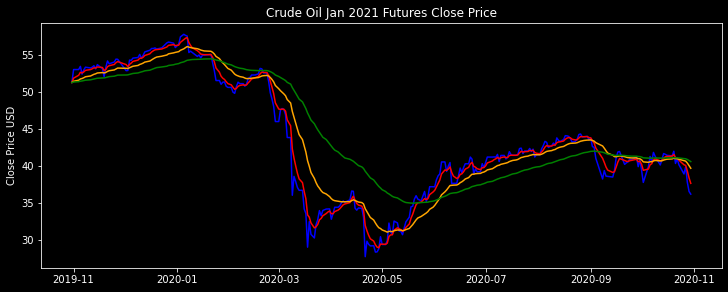

In [391]:
# Visualize the closing price and the exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Crude Oil Jan 2021 Futures Close Price')
plt.plot(CL['Close'], label='Close Price', color='blue')
plt.plot(ShortEMACL, label='Short-Fast EMA', color='red')
plt.plot(MiddleEMACL, label='Midle-Medium EMA', color='orange')
plt.plot(LongEMACL, label='Long-Slow EMA', color='green')
plt.ylabel('Close Price USD')
plt.show

<function matplotlib.pyplot.show>

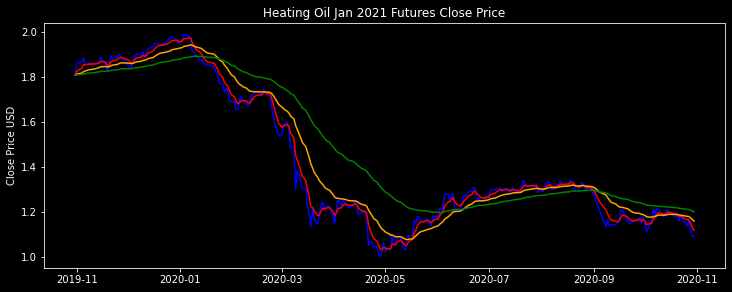

In [392]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Heating Oil Jan 2021 Futures Close Price')
plt.plot(HO['Close'], label='Close Price', color='blue')
plt.plot(ShortEMAHO, label='Short-Fast EMA', color='red')
plt.plot(MiddleEMAHO, label='Midle-Medium EMA', color='orange')
plt.plot(LongEMAHO, label='Long-Slow EMA', color='green')
plt.ylabel('Close Price USD')
plt.show

<function matplotlib.pyplot.show>

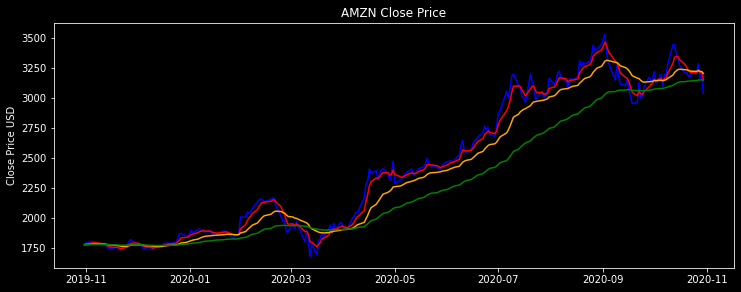

In [393]:
plt.figure(figsize=(12.2, 4.5))
plt.title('AMZN Close Price')
plt.plot(AZ['Close'], label='Close Price', color='blue')
plt.plot(ShortEMAAZ, label='Short-Fast EMA', color='red')
plt.plot(MiddleEMAAZ, label='Midle-Medium EMA', color='orange')
plt.plot(LongEMAAZ, label='Long-Slow EMA', color='green')
plt.ylabel('Close Price USD')
plt.show

In [394]:
# Add the exponential moving averages to the data set
CL['Short'] = ShortEMACL
CL['Middle'] = MiddleEMACL
CL['Long'] = LongEMACL

HO['Short'] = ShortEMAHO
HO['Middle'] = MiddleEMAHO
HO['Long'] = LongEMAHO

AZ['Short'] = ShortEMAAZ
AZ['Middle'] = MiddleEMAAZ
AZ['Long'] = LongEMAAZ

In [395]:
# Create the function to buy and sell the asset
def buy_sell_function(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  
  return (buy_list, sell_list)

In [396]:
# Add the buy and sell signals to the data set
CL['Buy'] = buy_sell_function(CL)[0]
CL['Sell'] = buy_sell_function(CL)[1]

HO['Buy'] = buy_sell_function(HO)[0]
HO['Sell'] = buy_sell_function(HO)[1]

AZ['Buy'] = buy_sell_function(AZ)[0]
AZ['Sell'] = buy_sell_function(AZ)[1]

<function matplotlib.pyplot.show>

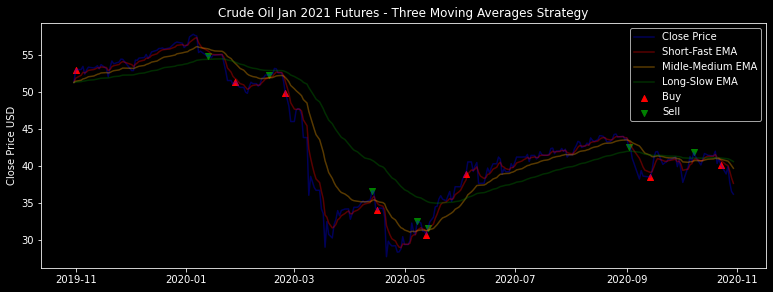

In [397]:
# Visually show the asset buy and sell signals
plt.figure(figsize=(13, 4.5))
plt.title('Crude Oil Jan 2021 Futures - Three Moving Averages Strategy')
plt.plot(CL['Close'], label='Close Price', color='blue', alpha = 0.35)
plt.plot(ShortEMACL, label='Short-Fast EMA', color='red', alpha = 0.35)
plt.plot(MiddleEMACL, label='Midle-Medium EMA', color='orange', alpha = 0.35)
plt.plot(LongEMACL, label='Long-Slow EMA', color='green', alpha = 0.35)
plt.scatter(CL.index, CL['Buy'], color= 'red', label= 'Buy', marker='^', alpha=1)
plt.scatter(CL.index, CL['Sell'], color= 'green', label = 'Sell', marker='v', alpha=1)
plt.ylabel('Close Price USD')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

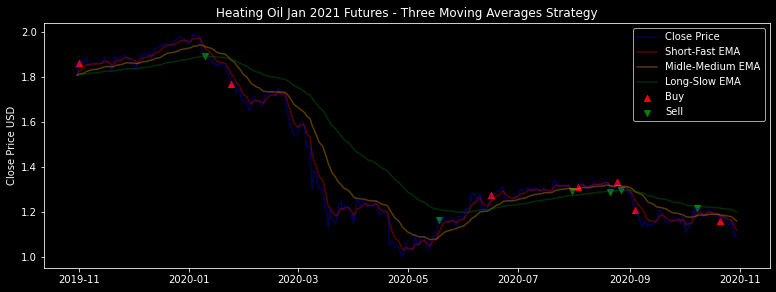

In [398]:
plt.figure(figsize=(13, 4.5))
plt.title('Heating Oil Jan 2021 Futures - Three Moving Averages Strategy')
plt.plot(HO['Close'], label='Close Price', color='blue', alpha = 0.35)
plt.plot(ShortEMAHO, label='Short-Fast EMA', color='red', alpha = 0.35)
plt.plot(MiddleEMAHO, label='Midle-Medium EMA', color='orange', alpha = 0.35)
plt.plot(LongEMAHO, label='Long-Slow EMA', color='green', alpha = 0.35)
plt.scatter(HO.index, HO['Buy'], color= 'red', label= 'Buy', marker='^', alpha=1)
plt.scatter(HO.index, HO['Sell'], color= 'green', label = 'Sell', marker='v', alpha=1)
plt.legend()
plt.ylabel('Close Price USD')
plt.show

<function matplotlib.pyplot.show>

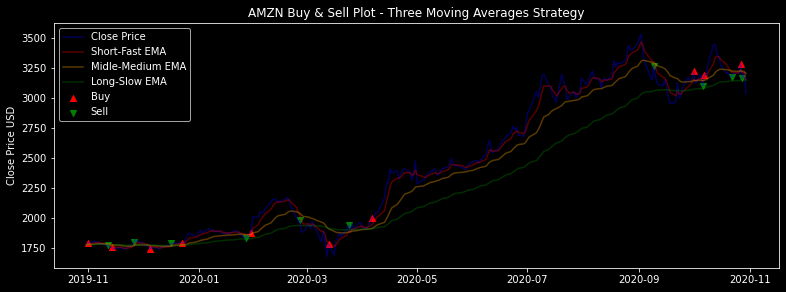

In [400]:
plt.figure(figsize=(13, 4.5))
plt.title('AMZN Buy & Sell Plot - Three Moving Averages Strategy')
plt.plot(AZ['Close'], label='Close Price', color='blue', alpha = 0.35)
plt.plot(ShortEMAAZ, label='Short-Fast EMA', color='red', alpha = 0.35)
plt.plot(MiddleEMAAZ, label='Midle-Medium EMA', color='orange', alpha = 0.35)
plt.plot(LongEMAAZ, label='Long-Slow EMA', color='green', alpha = 0.35)
plt.scatter(AZ.index, AZ['Buy'], color= 'red', label = 'Buy', marker='^', alpha=1)
plt.scatter(AZ.index, AZ['Sell'], color= 'green', label = 'Sell', marker='v', alpha=1)
plt.ylabel('Close Price USD')
plt.legend()
plt.show

In [401]:
# MACD Calculation
MACDCL = ShortEMACL - LongEMACL
MACDHO = ShortEMAHO - LongEMAHO
MACDAZ = ShortEMAAZ - LongEMAAZ

# Calculate the Signal Line
signalCL = MACDCL.ewm(span=9, adjust=False).mean()
signalHO = MACDHO.ewm(span=9, adjust=False).mean()
signalAZ = MACDAZ.ewm(span=9, adjust=False).mean()

# Calculate the Histogram
HistCL = MACDCL - signalCL
HistHO = MACDHO - signalHO
HistAZ = MACDAZ - signalAZ

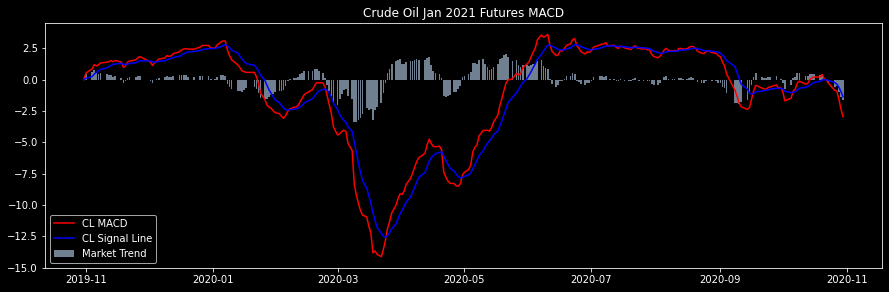

In [402]:
# Plot the Chart
plt.figure(figsize=(15, 4.5))
plt.title(label='Crude Oil Jan 2021 Futures MACD')
plt.plot(CL.index, MACDCL, label = 'CL MACD', color = 'red')
plt.plot(CL.index, signalCL, label = 'CL Signal Line', color = 'blue')
plt.bar(CL.index, HistCL, label = 'Market Trend', color = 'slategrey')
plt.legend()
plt.show()

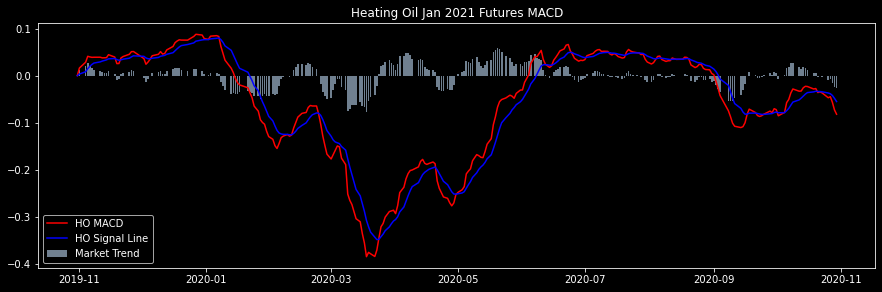

In [403]:
plt.figure(figsize=(15, 4.5))
plt.title(label='Heating Oil Jan 2021 Futures MACD')
plt.plot(HO.index, MACDHO, label = 'HO MACD', color = 'red')
plt.plot(HO.index, signalHO, label = 'HO Signal Line', color = 'blue')
plt.bar(HO.index, HistHO, label = 'Market Trend', color = 'slategrey')
plt.legend()
plt.show()

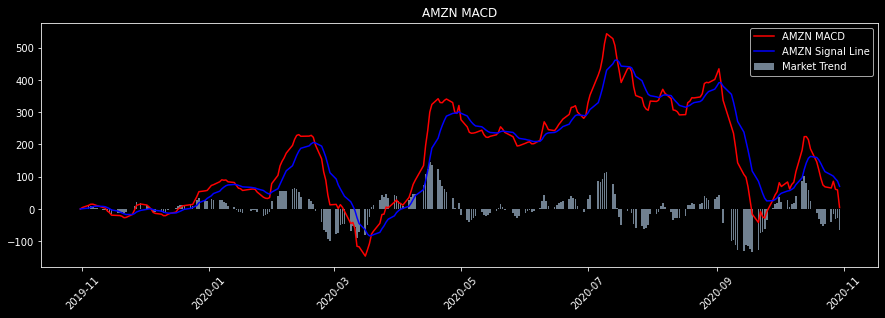

In [404]:
plt.figure(figsize=(15, 4.5))
plt.title(label='AMZN MACD')
plt.plot(AZ.index, MACDAZ, label = 'AMZN MACD', color = 'red')
plt.plot(AZ.index, signalAZ, label = 'AMZN Signal Line', color = 'blue')
plt.bar(AZ.index, HistAZ, label = 'Market Trend', color = 'slategrey')
plt.xticks(rotation=45)
plt.legend()
plt.show()

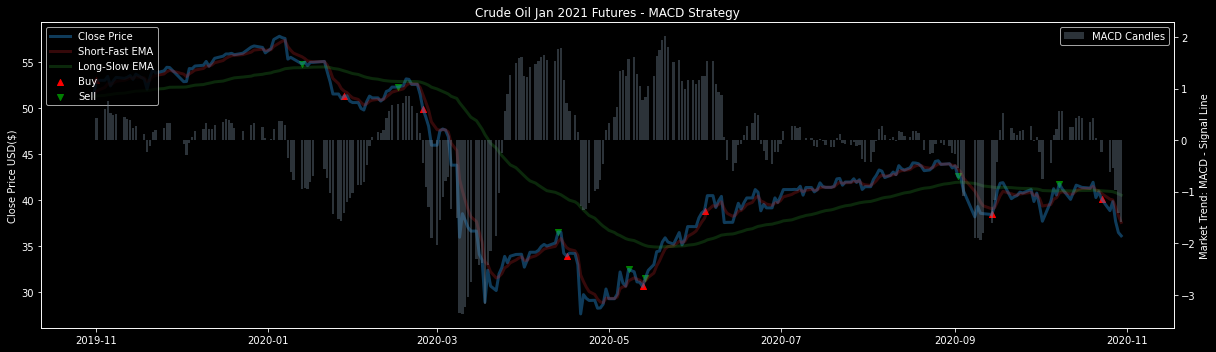

In [405]:
# Combine all
fig, ax1 = plt.subplots(figsize=(17,5))

plt.title(label='Crude Oil Jan 2021 Futures - MACD Strategy')

ax1.set_ylabel('Close Price USD($)')
ax1.plot(CL['Close'], label='Close Price', color='tab:blue', linewidth=3, alpha = 0.5)
ax1.plot(ShortEMACL, label='Short-Fast EMA', color='tab:red', linewidth=3, alpha = 0.25)
ax1.plot(LongEMACL, label='Long-Slow EMA', color='tab:green', linewidth=3, alpha = 0.25)
ax1.scatter(CL.index, CL['Buy'], color= 'red', label = 'Buy', marker='^', alpha=1)
ax1.scatter(CL.index, CL['Sell'], color= 'green', label = 'Sell', marker='v', alpha=1)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Market Trend: MACD - Signal Line')
ax2.bar(CL.index, HistCL, label = 'MACD Candles', color = 'slategrey', alpha=0.4)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

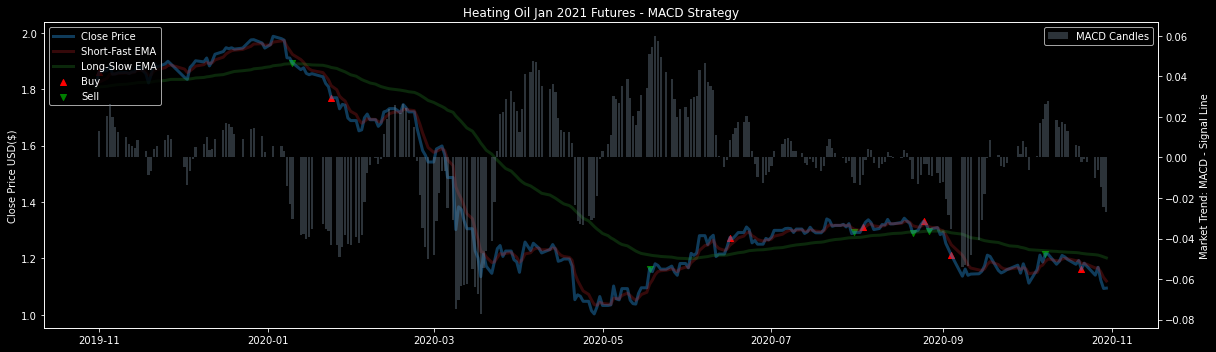

In [406]:
fig, ax1 = plt.subplots(figsize=(17,5))

plt.title(label='Heating Oil Jan 2021 Futures - MACD Strategy')

ax1.set_ylabel('Close Price USD($)')
ax1.plot(HO['Close'], label='Close Price', color='tab:blue', linewidth=3, alpha=0.5)
ax1.plot(ShortEMAHO, label='Short-Fast EMA', color='tab:red', linewidth=3, alpha = 0.25)
ax1.plot(LongEMAHO, label='Long-Slow EMA', color='tab:green', linewidth=3, alpha = 0.25)
ax1.scatter(HO.index, HO['Buy'], color= 'red', label = 'Buy', marker='^', alpha=1)
ax1.scatter(HO.index, HO['Sell'], color= 'green', label = 'Sell', marker='v', alpha=1)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Market Trend: MACD - Signal Line')

ax2.bar(HO.index, HistHO, label = 'MACD Candles', color = 'slategrey', alpha=0.4)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

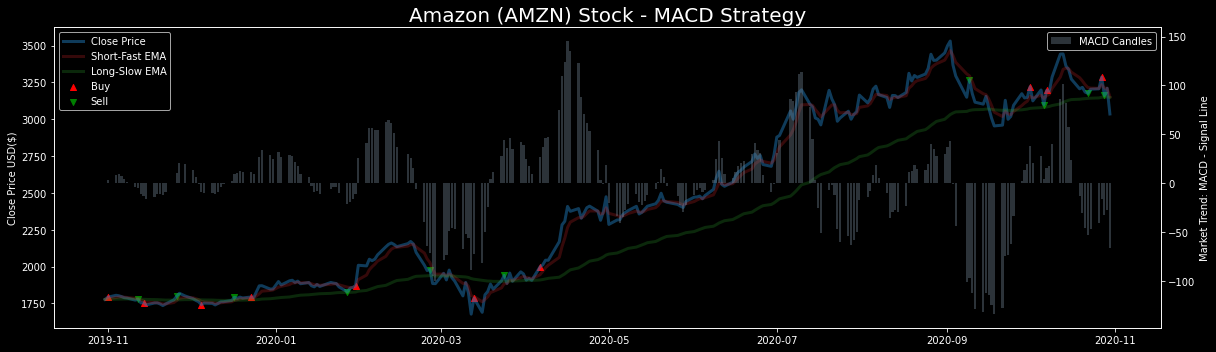

In [408]:
fig, ax1 = plt.subplots(figsize=(17,5))

plt.title(label='Amazon (AMZN) Stock - MACD Strategy', fontsize='20')

ax1.set_ylabel('Close Price USD($)')
ax1.plot(AZ['Close'], label='Close Price', color='tab:blue', linewidth=3, alpha=0.5)
ax1.plot(ShortEMAAZ, label='Short-Fast EMA', color='tab:red', linewidth=3, alpha = 0.25)
ax1.plot(LongEMAAZ, label='Long-Slow EMA', color='tab:green', linewidth=3, alpha = 0.25)
ax1.scatter(AZ.index, AZ['Buy'], color= 'red', label = 'Buy', marker='^', alpha=1)
ax1.scatter(AZ.index, AZ['Sell'], color= 'green', label = 'Sell', marker='v', alpha=1)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Market Trend: MACD - Signal Line')
ax2.bar(AZ.index, HistAZ, label = 'MACD Candles', color = 'slategrey', alpha=0.4)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [410]:
# Date format: YYYY, M, D

start = dt.datetime(2019,10,31)
end = dt.datetime(2020,10,31)

# Scrape the data from Yahoo Finance

CL = web.DataReader('CLF21.NYM','yahoo',start,end).reset_index()
HO = web.DataReader('HOF21.NYM','yahoo',start,end).reset_index()
AZ = web.DataReader('AMZN','yahoo',start,end).reset_index()

# Set the index

CL = CL.set_index(pd.DatetimeIndex(CL['Date'].values))
HO = HO.set_index(pd.DatetimeIndex(HO['Date'].values))
AZ = AZ.set_index(pd.DatetimeIndex(AZ['Date'].values))

In [411]:
# Calculate the simple moving average, standard deviation, upper band and the lower band
# Get the time period (20 days)
period = 20
# Calculate the Simple Moving Average (SMA)
CL['SMA'] = CL['Close'].rolling(window=period).mean()
HO['SMA'] = HO['Close'].rolling(window=period).mean()
AZ['SMA'] = AZ['Close'].rolling(window=period).mean()

# Get the standard deviation
CL['STD'] = CL['Close'].rolling(window=period).std()
HO['STD'] = HO['Close'].rolling(window=period).std()
AZ['STD'] = AZ['Close'].rolling(window=period).std()

# Calculate the upper Bollinger band
CL['Upper'] = CL['SMA'] + (CL['STD'] * 2)
HO['Upper'] = HO['SMA'] + (HO['STD'] * 2)
AZ['Upper'] = AZ['SMA'] + (AZ['STD'] * 2)

# Calculate the lower Bollinger band
CL['Lower'] = CL['SMA'] - (CL['STD'] * 2)
HO['Lower'] = HO['SMA'] - (HO['STD'] * 2)
AZ['Lower'] = AZ['SMA'] - (AZ['STD'] * 2)

# Create a list of columns to keep 
column_listCL = ['Close', 'SMA', 'Upper', 'Lower']
column_listHO = ['Close', 'SMA', 'Upper', 'Lower']
column_listAZ = ['Close', 'SMA', 'Upper', 'Lower']

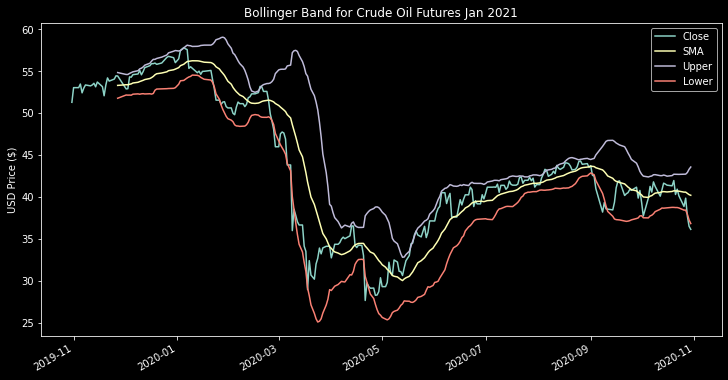

In [412]:
# Plot the data 
CL[column_listCL].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band for Crude Oil Futures Jan 2021')
plt.ylabel('USD Price ($)')
plt.show()

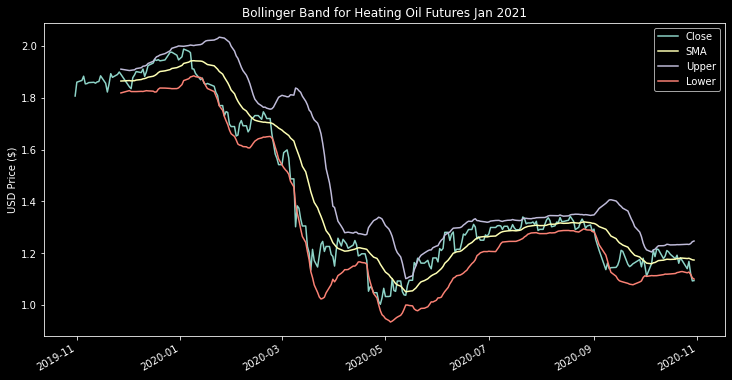

In [413]:
# Plot the data 
HO[column_listHO].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band for Heating Oil Futures Jan 2021')
plt.ylabel('USD Price ($)')
plt.show()

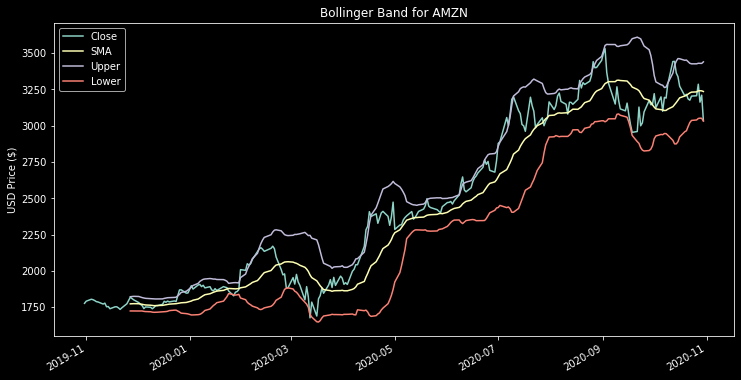

In [414]:
# Plot the data
AZ[column_listAZ].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band for AMZN')
plt.ylabel('USD Price ($)')
plt.show()

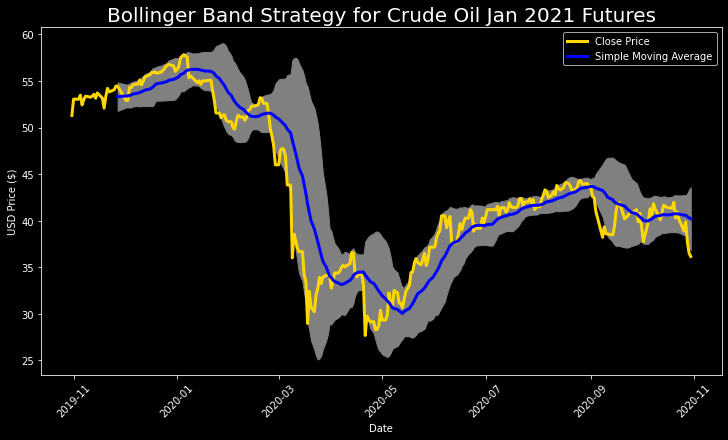

In [415]:
# Plot and shade the area between the two Bollinger bands
# Get the figure and the figure size 
figCL = plt.figure(figsize=(12.2, 6.4))
# Add the subplot
ax = figCL.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = CL.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, CL['Upper'], CL['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, CL['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, CL['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average')
# Set the title and show the image
ax.set_title('Bollinger Band Strategy for Crude Oil Jan 2021 Futures', fontsize = 20)
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

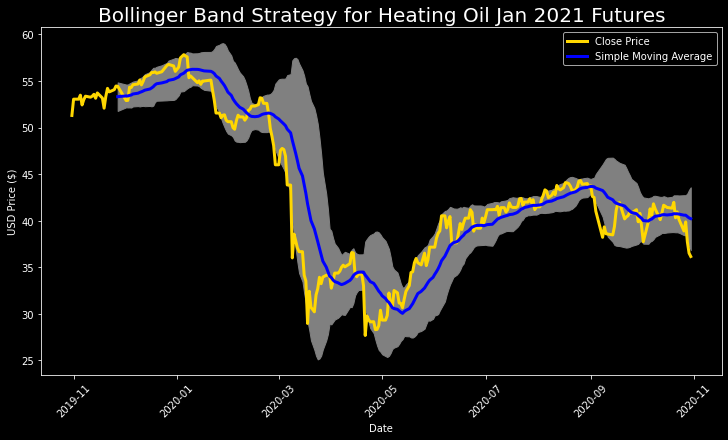

In [416]:
# Plot and shade the area between the two Bollinger bands
# Get the figure and the figure size 
figHO = plt.figure(figsize=(12.2, 6.4))
# Add the subplot
ax = figHO.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = CL.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, CL['Upper'], CL['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, CL['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, CL['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average')
# Set the title and show the image
ax.set_title('Bollinger Band Strategy for Heating Oil Jan 2021 Futures', fontsize = 20)
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

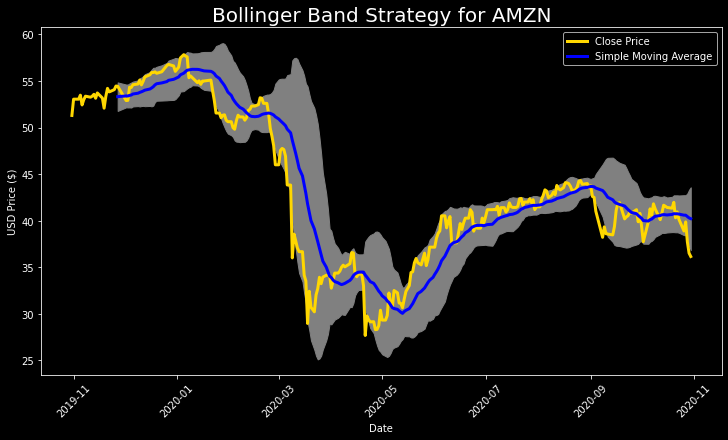

In [417]:
# Plot and shade the area between the two Bollinger bands
# Get the figure and the figure size 
figAZ = plt.figure(figsize=(12.2, 6.4))
# Add the subplot
ax = figAZ.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = CL.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, CL['Upper'], CL['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, CL['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, CL['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average')
# Set the title and show the image
ax.set_title('Bollinger Band Strategy for AMZN', fontsize = 20)
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [ ]:
# The idea of this strategy is to swee when the close price reaches the upper 
# bollinger band or the lower bolinger band that will tell us to 
# either buy or sell that asset at that price

In [418]:
# Create a new data frame 
new_CL = CL[period-1:]
new_HO = HO[period-1:]
new_AZ = AZ[period-1:]

In [419]:
# Create a function to get the buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: # Then you should sell
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: # Then you should buy
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal, sell_signal)

In [420]:
# Create two new columns
new_CL['Buy'] = get_signal(new_CL)[0]
new_CL['Sell'] = get_signal(new_CL)[1]

new_HO['Buy'] = get_signal(new_HO)[0]
new_HO['Sell'] = get_signal(new_HO)[1]

new_AZ['Buy'] = get_signal(new_AZ)[0]
new_AZ['Sell'] = get_signal(new_AZ)[1]

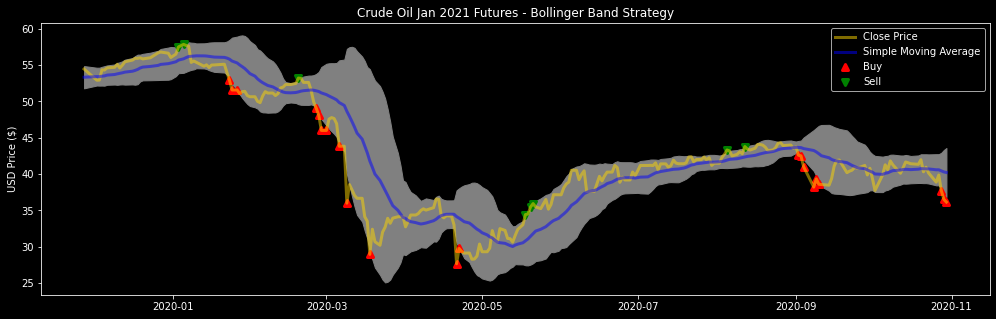

In [425]:
# Plot all of the data
# Get the figure and the figure size 
fig_new_CL = plt.figure(figsize=(17, 5))
# Add the subplot
ax = fig_new_CL.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = new_CL.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, new_CL['Upper'], new_CL['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, new_CL['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = 0.5)
ax.plot(x_axis, new_CL['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, new_CL['Buy'], color = 'red', lw=3, label='Buy', marker= '^', alpha = 1)
ax.scatter(x_axis, new_CL['Sell'], color = 'green', lw=3, label='Sell', marker= 'v', alpha = 1)
# Set the title and show the image
ax.set_title('Crude Oil Jan 2021 Futures - Bollinger Band Strategy')
ax.set_ylabel('USD Price ($)')
ax.legend()
plt.show()

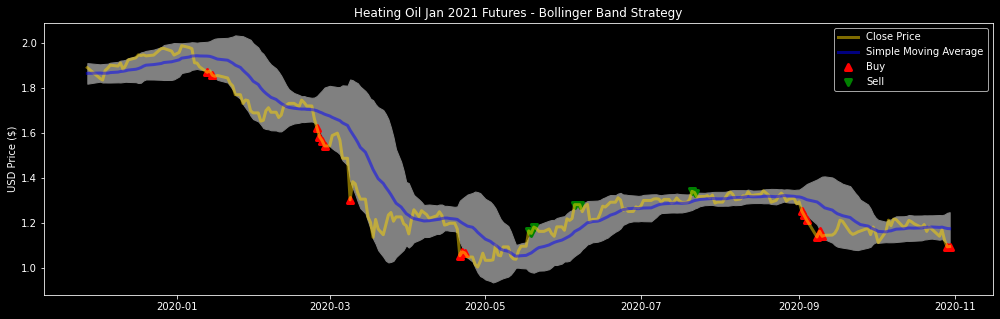

In [427]:
# Plot all of the data
# Get the figure and the figure size 
fig_new_HO = plt.figure(figsize=(17, 5))
# Add the subplot
ax = fig_new_HO.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = new_HO.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, new_HO['Upper'], new_HO['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, new_HO['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = 0.5)
ax.plot(x_axis, new_HO['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, new_HO['Buy'], color = 'red', lw=3, label='Buy', marker= '^', alpha = 1)
ax.scatter(x_axis, new_HO['Sell'], color = 'green', lw=3, label='Sell', marker= 'v', alpha = 1)
# Set the title and show the image
ax.set_title('Heating Oil Jan 2021 Futures - Bollinger Band Strategy')
ax.set_ylabel('USD Price ($)')
ax.legend()
plt.show()

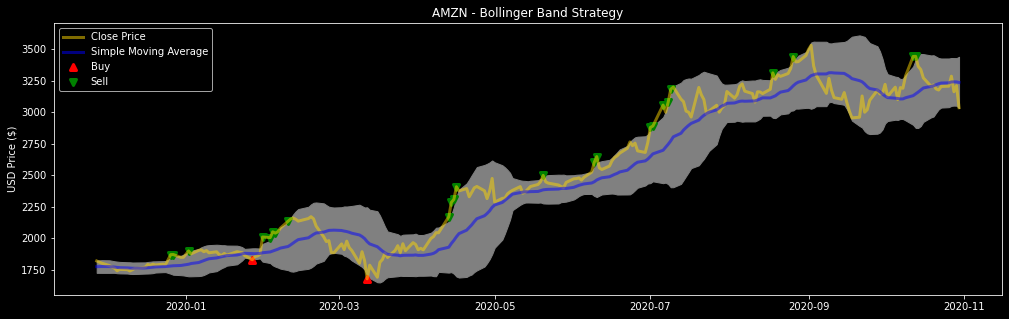

In [429]:
# Plot all of the data
# Get the figure and the figure size 
fig_new_AZ = plt.figure(figsize=(17, 5))
# Add the subplot
ax = fig_new_AZ.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = new_AZ.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, new_AZ['Upper'], new_AZ['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, new_AZ['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = 0.5)
ax.plot(x_axis, new_AZ['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, new_AZ['Buy'], color = 'red', lw=3, label='Buy', marker= '^', alpha = 1)
ax.scatter(x_axis, new_AZ['Sell'], color = 'green', lw=3, label='Sell', marker= 'v', alpha = 1)
# Set the title and show the image
ax.set_title('AMZN - Bollinger Band Strategy')
ax.set_ylabel('USD Price ($)')
ax.legend()
plt.show()

In [ ]:
# MFI (Money Flow Index) or also known as Volume Weighted RSI, is an oscillator 
# that uses price and volume data to determine when an asset is either overbought
# or oversold. Similar to RSI, a MFI level above 80 is considered over-bought
# which indicateds to buy, and below 20 is considered under-sold and indicates
# to buy. Then also 90 and 10 are also used as thresholds.

In [458]:
# Import new libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [459]:
# Get one years worth of data
# Date format: YYYY, M, D

start = dt.datetime(2019,10,31)
end = dt.datetime(2020,10,31)

# Scrape the data from Yahoo Finance

CL = web.DataReader('CLF21.NYM','yahoo',start,end).reset_index()
HO = web.DataReader('HOF21.NYM','yahoo',start,end).reset_index()
AZ = web.DataReader('AMZN','yahoo',start,end).reset_index()

# Set the index

CL = CL.set_index(pd.DatetimeIndex(CL['Date'].values))
HO = HO.set_index(pd.DatetimeIndex(HO['Date'].values))
AZ = AZ.set_index(pd.DatetimeIndex(AZ['Date'].values))

In [460]:
# Calculate the typical price
CLtypical_price = (CL['Close'] + CL['High'] + CL['Low']) / 3
HOtypical_price = (HO['Close'] + HO['High'] + HO['Low']) / 3
AZtypical_price = (AZ['Close'] + AZ['High'] + AZ['Low']) / 3

In [461]:
# Set the new peirod
period1 = 14

# Calculate the money flow
CLmoney_flow = CLtypical_price * CL['Volume']
HOmoney_flow = HOtypical_price * HO['Volume']
AZmoney_flow = AZtypical_price * AZ['Volume']

In [462]:
# Get all the positive and negative money flows
CLpositive_flow = []
CLnegative_flow = []

# Loop through the typical price
for i in range(1, len(CLtypical_price)):
  if CLtypical_price[i] > CLtypical_price[i-1]:
    CLpositive_flow.append(CLmoney_flow[i-1])
    CLnegative_flow.append(0)
  elif CLtypical_price[i] < CLtypical_price[i-1]:
    CLnegative_flow.append(CLmoney_flow[i-1])
    CLpositive_flow.append(0)
  else:
    CLpositive_flow.append(0)
    CLnegative_flow.append(0)

In [463]:
HOpositive_flow = []
HOnegative_flow = []

# Loop through the typical price
for i in range(1, len(HOtypical_price)):
  if HOtypical_price[i] > HOtypical_price[i-1]:
    HOpositive_flow.append(HOmoney_flow[i-1])
    HOnegative_flow.append(0)
  elif HOtypical_price[i] < HOtypical_price[i-1]:
    HOnegative_flow.append(HOmoney_flow[i-1])
    HOpositive_flow.append(0)
  else:
    HOpositive_flow.append(0)
    HOnegative_flow.append(0)

In [464]:
AZpositive_flow = []
AZnegative_flow = []

# Loop through the typical price
for i in range(1, len(AZtypical_price)):
  if AZtypical_price[i] > AZtypical_price[i-1]:
    AZpositive_flow.append(AZmoney_flow[i-1])
    AZnegative_flow.append(0)
  elif AZtypical_price[i] < AZtypical_price[i-1]:
    AZnegative_flow.append(AZmoney_flow[i-1])
    AZpositive_flow.append(0)
  else:
    AZpositive_flow.append(0)
    AZnegative_flow.append(0)

In [465]:
# Get all of the positive and negative money flows within the time period
CLpositive_mf = []
CLnegative_mf = []

for i in range(period1-1, len(CLpositive_flow)):
  CLpositive_mf.append( sum(CLpositive_flow[i + 1- period : i +1]) )
for i in range(period1-1, len(CLnegative_flow)):
  CLnegative_mf.append( sum(CLnegative_flow[i + 1- period : i +1]) ) 

In [466]:
HOpositive_mf = []
HOnegative_mf = []

for i in range(period1-1, len(HOpositive_flow)):
  HOpositive_mf.append( sum(HOpositive_flow[i + 1- period : i+1]) )
for i in range(period1-1, len(HOnegative_flow)):
  HOnegative_mf.append( sum(HOnegative_flow[i + 1- period : i+1]) ) 

In [467]:
AZpositive_mf = []
AZnegative_mf = []

for i in range(period1-1, len(AZpositive_flow)):
  AZpositive_mf.append( sum(AZpositive_flow[i + 1- period : i +1]) )
for i in range(period1-1, len(AZnegative_flow)):
  AZnegative_mf.append( sum(AZnegative_flow[i + 1- period : i +1]) ) 

In [468]:
# Calculate the money flow index
CL_mfi = 100 * (np.array(CLpositive_mf) / (np.array(CLpositive_mf) + np.array(CLnegative_mf) ))

In [469]:
# Calculate the money flow index
HO_mfi = 100 * (np.array(HOpositive_mf) / (np.array(HOpositive_mf) + np.array(HOnegative_mf)))

In [470]:
# Calculate the money flow index
AZ_mfi = 100 * (np.array(AZpositive_mf) / (np.array(AZpositive_mf) + np.array(AZnegative_mf)))

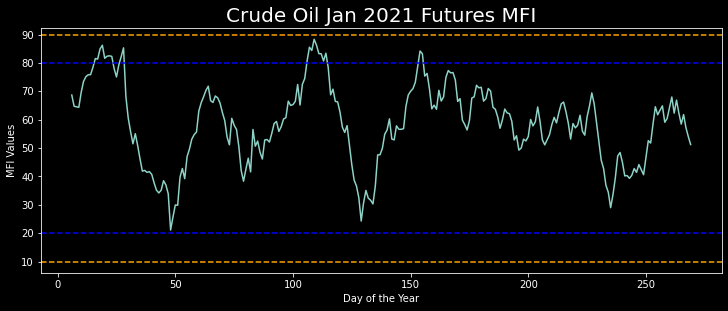

In [471]:
# Visually show the MFI
cl2 = pd.DataFrame()
cl2['MFI'] = CL_mfi
# Create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(cl2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('Crude Oil Jan 2021 Futures MFI', fontsize=20)
plt.ylabel('MFI Values')
plt.xlabel('Day of the Year')
plt.show()

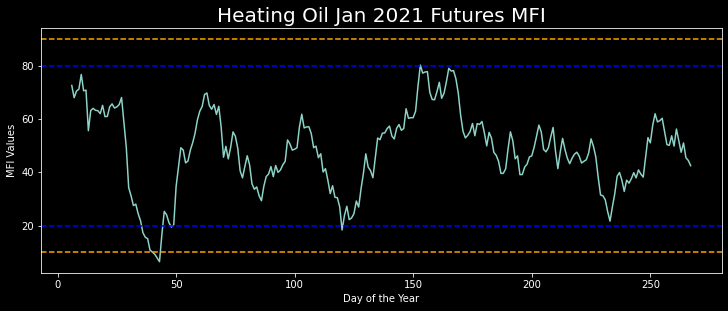

In [472]:
# Visually show the MFI
ho2 = pd.DataFrame()
ho2['MFI'] = HO_mfi
# Create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(ho2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('Heating Oil Jan 2021 Futures MFI', fontsize=20)
plt.ylabel('MFI Values')
plt.xlabel('Day of the Year')
plt.show()

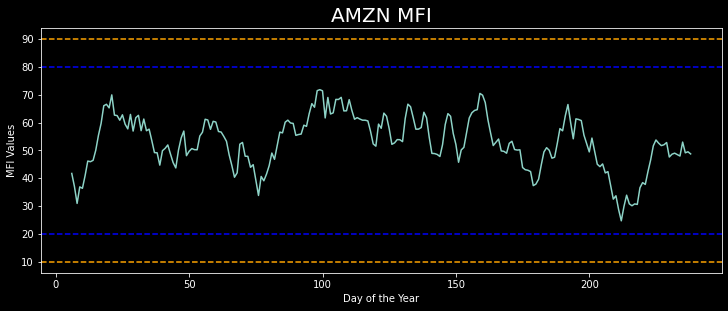

In [473]:
# Visually show the MFI
az2 = pd.DataFrame()
az2['MFI'] = AZ_mfi
# Create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(az2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('AMZN MFI', fontsize=20)
plt.ylabel('MFI Values')
plt.xlabel('Day of the Year')
plt.show()

In [474]:
# Create a new data frame
new_CL2 = pd.DataFrame()
new_CL2 = CL[period1:]
new_CL2['MFI'] = CL_mfi

new_HO2 = pd.DataFrame()
new_HO2 = HO[period1:]
new_HO2['MFI'] = HO_mfi

new_AZ2 = pd.DataFrame()
new_AZ2 = AZ[period1:]
new_AZ2['MFI'] = AZ_mfi

In [475]:
# Create a function to get the buy and sell signals 
def get_signal(data, high , low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return (buy_signal, sell_signal)
  

In [476]:
# Add new columns (Buy & Sell)
new_CL2['Buy'] = get_signal(new_CL2, 80, 20)[0]
new_CL2['Sell'] = get_signal(new_CL2, 80, 20)[1]

new_HO2['Buy'] = get_signal(new_HO2, 80, 20)[0]
new_HO2['Sell'] = get_signal(new_HO2, 80, 20)[1]

new_AZ2['Buy'] = get_signal(new_AZ2, 80, 20)[0]
new_AZ2['Sell'] = get_signal(new_AZ2, 80, 20)[1]

ConversionError: ignored

<Figure size 878.4x324 with 1 Axes>

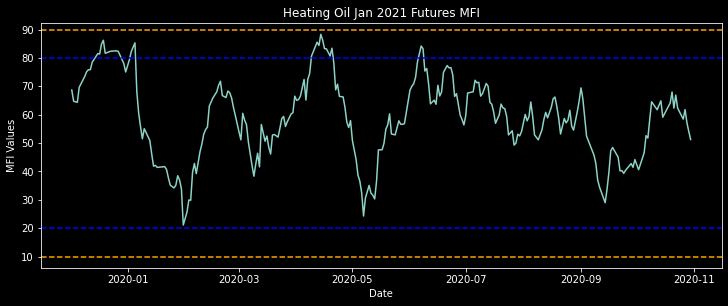

In [480]:
# Plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(CL['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_CL2.index, new_CL2['Buy'], color = 'red', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_CL2.index, new_CL2['Sell'], color = 'green', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.title('Crude Oil Jan 2021 Futures Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend( loc = 'upper left')
plt.show()
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_CL2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('Heating Oil Jan 2021 Futures MFI')
plt.ylabel('MFI Values')
plt.xlabel('Date')
plt.show()

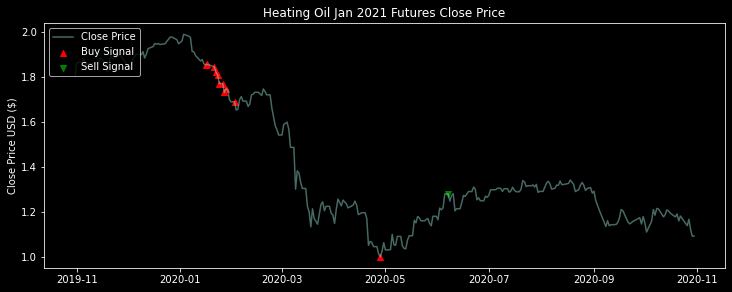

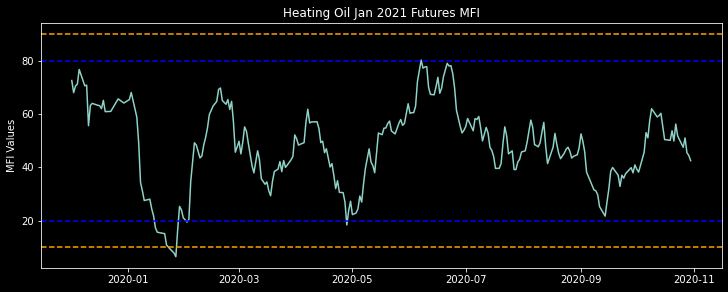

In [457]:
# Plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(HO['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_HO2.index, new_HO2['Buy'], color = 'red', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_HO2.index, new_HO2['Sell'], color = 'green', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.title('Heating Oil Jan 2021 Futures Close Price')
plt.ylabel('Close Price USD ($)')
plt.legend( loc = 'upper left')
plt.show()
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_HO2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('Heating Oil Jan 2021 Futures MFI')
plt.ylabel('MFI Values')
plt.show()

In [482]:
# Fixing prior CL issue
start = dt.datetime(2019,10,31)
end = dt.datetime(2020,10,31)

# Scrape the data from Yahoo Finance

df = web.DataReader('CLF21.NYM','yahoo',start,end).reset_index()

# Set the index

df = df.set_index(pd.DatetimeIndex(CL['Date'].values))

In [483]:
# Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3

In [484]:
# Set the new peirod
period = 14

# Calculate the money flow
money_flow = typical_price * df['Volume']

In [486]:
# Get all the positive and negative money flows
positive_flow = []
negative_flow = []

# Loop through the typical price
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)

In [487]:
# Get all of the positive and negative money flows within the time period
positive_mf = []
negative_mf = []

for i in range(period1-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i + 1- period : i +1]) )
for i in range(period1-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i + 1- period : i +1]) ) 

In [489]:
# Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))

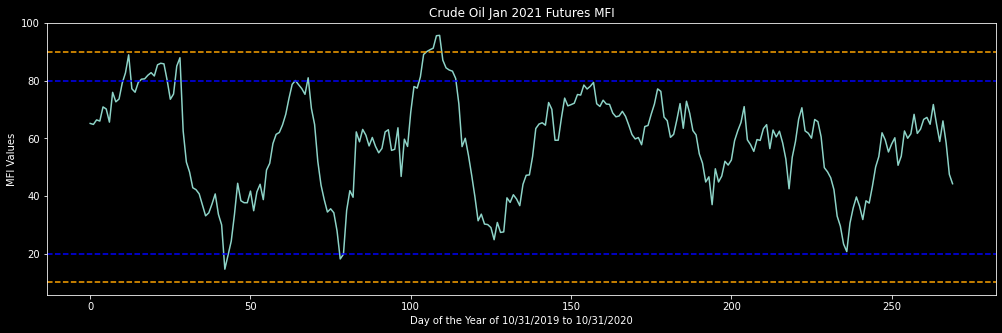

In [492]:
# Visually show the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi
# Create the plot
plt.figure(figsize=(17, 5))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.title('Crude Oil Jan 2021 Futures MFI')
plt.ylabel('MFI Values')
plt.xlabel('Day of the Year of 10/31/2019 to 10/31/2020')
plt.show()

In [493]:
# Create a new data frame
new_df = pd.DataFrame()
new_df = df[period1:]
new_df['MFI'] = mfi

In [494]:
# Create a function to get the buy and sell signals 
def get_signal(data, high , low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return (buy_signal, sell_signal)

In [495]:
# Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]

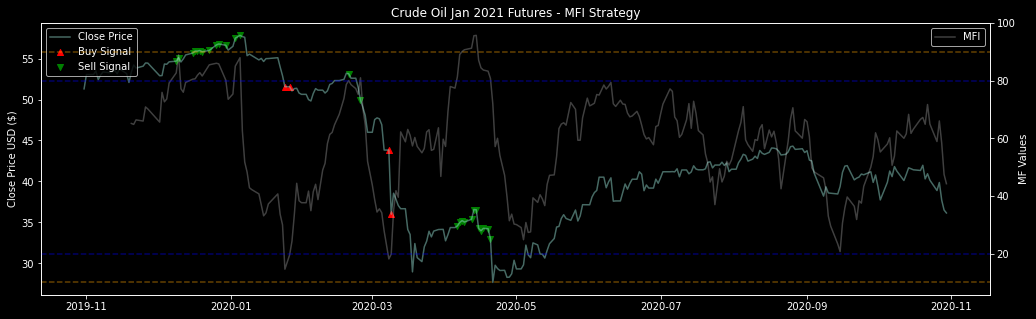

In [509]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(17,5))

plt.title(label='Crude Oil Jan 2021 Futures - MFI Strategy')

ax1.set_ylabel('Close Price USD ($)')
ax1.plot(df['Close'], label = 'Close Price', alpha = 0.5)
ax1.scatter(new_df.index, new_df['Buy'], color = 'red', label = 'Buy Signal', marker = '^', alpha = 1)
ax1.scatter(new_df.index, new_df['Sell'], color = 'green', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.legend( loc = 'upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('MF Values')
ax2.plot(new_df['MFI'], label='MFI', color='white', alpha=0.25)
ax2.axhline(10, linestyle= '--', color = 'orange', alpha=0.4)
ax2.axhline(20, linestyle= '--', color = 'blue', alpha=0.4)
ax2.axhline(80, linestyle= '--', color = 'blue', alpha=0.4)
ax2.axhline(90, linestyle= '--', color = 'orange', alpha=0.4)

ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.show()

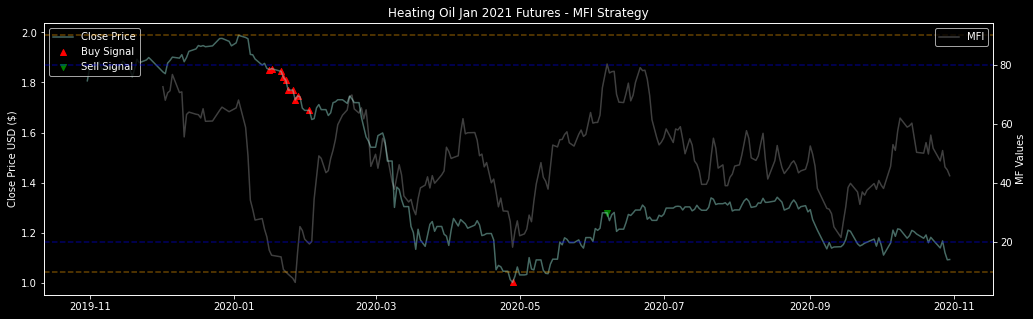

In [515]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(17,5))

plt.title(label='Heating Oil Jan 2021 Futures - MFI Strategy')

ax1.set_ylabel('Close Price USD ($)')
ax1.plot(HO['Close'], label = 'Close Price', alpha = 0.5)
ax1.scatter(new_HO2.index, new_HO2['Buy'], color = 'red', label = 'Buy Signal', marker = '^', alpha = 1)
ax1.scatter(new_HO2.index, new_HO2['Sell'], color = 'green', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.legend( loc = 'upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('MF Values')
ax2.plot(new_HO2['MFI'], label='MFI', color='white', alpha=0.25)
ax2.axhline(10, linestyle= '--', color = 'orange', alpha=0.4)
ax2.axhline(20, linestyle= '--', color = 'blue', alpha=0.4)
ax2.axhline(80, linestyle= '--', color = 'blue', alpha=0.4)
ax2.axhline(90, linestyle= '--', color = 'orange', alpha=0.4)

ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.show()